<h3>Kaggle Challenge</h3>
<h1>Expedia Hotel Recommendation</h1>
<hr style="height:2px;border:none;color:#333;background-color:#333;"/>

### Imports

In [ ]:
import numpy as np
import pandas as pd
from datetime import timedelta as td
pd.set_option('display.max_columns', 500)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)

ROWS = 200000

In [3]:
expediaDF = pd.read_csv('data/train.csv.gz', compression='gzip',
                   error_bad_lines=False)

In [4]:
expediaDF.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


## Data Analysis

- How many rows?

In [7]:
print('Rows: ',expediaDF['site_name'].size)

Rows:  37670293


### Types of the features

Text(0.5,1,'Features Quantity per Type')

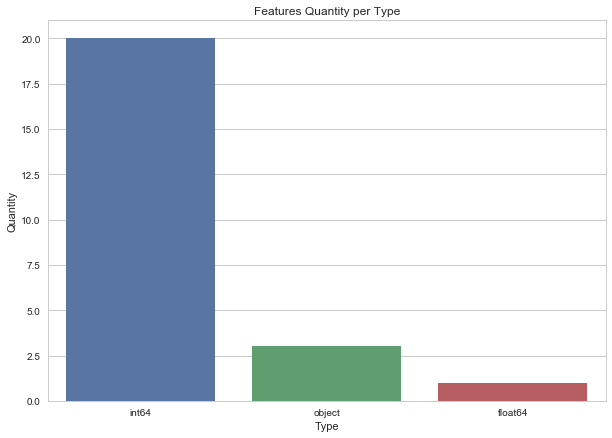

In [28]:
fig, ax = plt.subplots()

types = expediaDF.dtypes.value_counts()

sns.barplot(types.index, types.values)
ax.set_ylabel("Quantity")
ax.set_xlabel("Type")
ax.set_title('Features Quantity per Type')

### Hotel Clusters

In [39]:
uniqueClusters = expediaDF['hotel_cluster'].unique().size
print("Total n. hotel clusters: ", uniqueClusters)

Total n. hotel clusters:  100


Distribution of the Hotel Clusters


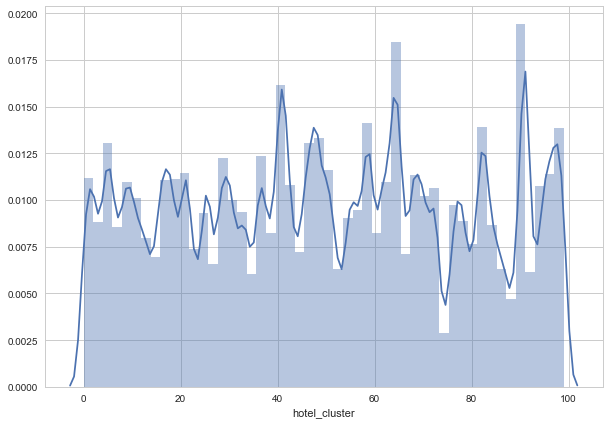

In [40]:
print("Distribution of the Hotel Clusters")
sns.distplot(expediaDF['hotel_cluster']);

### Users

In [48]:
uniqueUsers = expediaDF['user_id'].unique().size
print("Total n. usuários: ", uniqueUsers)

Total n. usuários:  1198786


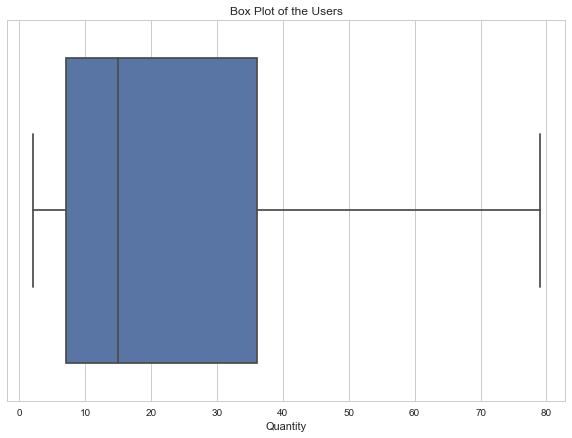

In [47]:
plt.figure(figsize=(10,7))
sns.boxplot(expediaDF['user_id'].value_counts(),showfliers=False)
plt.title('Box Plot of the Users')
plt.xlabel('Quantity')
plt.show()

### Destination

In [50]:
unique = expediaDF['srch_destination_id'].unique().size
print("Total n. destinations: ", unique)

Total n. usuários:  59455


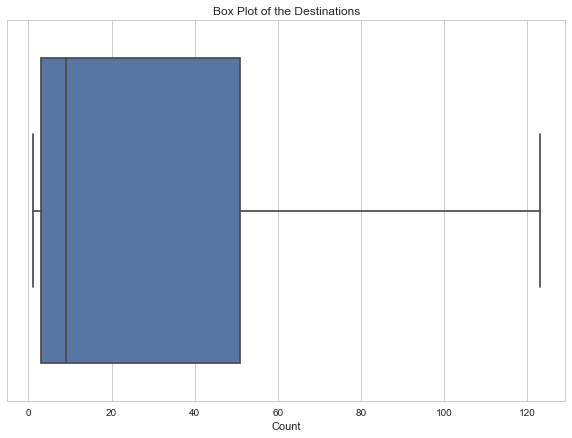

In [56]:
plt.figure(figsize=(10,7))
sns.boxplot(expediaDF['srch_destination_id'].value_counts(),showfliers=False)
plt.title('Box Plot of the Destinations')
plt.xlabel('Count')
plt.show()

### Type of Destination

In [61]:
unique = expediaDF['srch_destination_type_id'].unique().size
print("Total n. type of destinations: ", unique)

Total n. type of destinations:  10


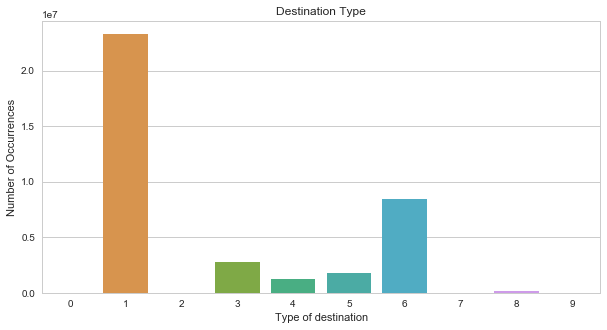

In [69]:
destTypeCount  = expediaDF['srch_destination_type_id'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(destTypeCount.index, destTypeCount.values)
plt.title('Destination Type')
plt.ylabel('Number of Occurrences')
plt.xlabel('Type of destination')
plt.show()

### Booking vs Click

Click      34669600
Booking     3000693
Name: is_booking, dtype: int64


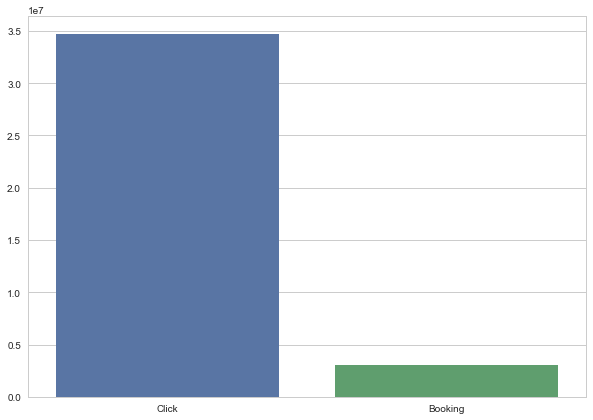

In [81]:
#1 is booking, 0 click
bookingCount = expediaDF.is_booking.value_counts()
bookingCount.index = ["Click",  "Booking"]
sns.barplot(bookingCount.index, bookingCount.values)

ax.set_ylabel("Quantity")
ax.set_xlabel("Type")
ax.set_title('Features Quantity per Type')
print(bookingCount)

### Missing Values

**Missing values** 
orig_destination_distance    13525001
srch_co                         47084
srch_ci                         47083
dtype: int64


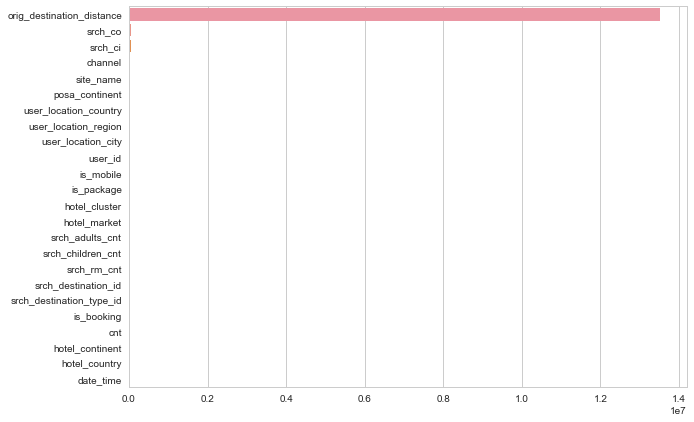

In [108]:
missingValues = expediaDF.isnull().sum().sort_values(ascending=False)
print('**Missing values** ')
print(missingValues[missingValues > 0])
sns.barplot(missingValues.values, missingValues.index)

### Checkin / Checkout

In [117]:
checkInOut = expediaDF.dropna(subset = ['srch_ci', 'srch_co'])

In [136]:
size = checkInOut[checkInOut['srch_co'] < checkInOut['srch_ci']].size
print("Checkin Data after  Checkout: ", size)

Checkin Data after  Checkout:  19152


In [137]:
checkInOut = checkInOut[checkInOut['srch_co'] > checkInOut['srch_ci']] #normalization
checkInOut['srch_ci'] = checkInOut['srch_ci'].astype('datetime64[ns]')
checkInOut['srch_co'] = checkInOut['srch_co'].astype('datetime64[ns]')
diff = checkInOut['srch_co'] - checkInOut['srch_ci']
diff

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0          4 days
1          4 days
2          4 days
3          5 days
4          5 days
5          5 days
6          1 days
7          1 days
8          1 days
9          1 days
10         1 days
11         1 days
12         3 days
13         3 days
14         3 days
15         2 days
16         2 days
17         2 days
18         2 days
19         2 days
20         2 days
21         2 days
22         2 days
23         2 days
24         1 days
25         2 days
26         8 days
27         8 days
28         2 days
29         2 days
            ...  
37670263   4 days
37670264   4 days
37670265   4 days
37670266   4 days
37670267   6 days
37670268   6 days
37670269   6 days
37670270   6 days
37670271   6 days
37670272   1 days
37670273   1 days
37670274   1 days
37670275   1 days
37670276   1 days
37670277   1 days
37670278   2 days
37670279   4 days
37670280   4 days
37670281   4 days
37670282   7 days
37670283   1 days
37670284   1 days
37670285   1 days
37670286   4 days
37670287  

Checkin Data after  Checkout:  19152


In [140]:
diff.value_counts()

1 days      10007295
2 days       7641766
3 days       6487383
4 days       4558994
5 days       2634121
7 days       2135625
6 days       1803779
8 days        651510
9 days        406561
10 days       311324
14 days       196512
11 days       154875
13 days       124117
12 days       109383
15 days        50687
16 days        29762
21 days        24020
17 days        20428
20 days        18571
28 days        16156
19 days        15058
18 days        14673
22 days         8530
26 days         7931
25 days         7879
27 days         6035
23 days         5896
24 days         5846
31 days         2894
30 days         2849
              ...   
178 days           1
307 days           1
206 days           1
105 days           1
223 days           1
322 days           1
172 days           1
221 days           1
377 days           1
157 days           1
175 days           1
252 days           1
139 days           1
219 days           1
173 days           1
279 days           1
294 days     

In [179]:
diffCount.sort_values(ascending=False)

1      10007295
2       7641766
3       6487383
4       4558994
5       2634121
7       2135625
6       1803779
8        651510
9        406561
10       311324
14       196512
11       154875
13       124117
12       109383
15        50687
16        29762
21        24020
17        20428
20        18571
28        16156
19        15058
18        14673
22         8530
26         7931
25         7879
27         6035
23         5896
24         5846
31         2894
30         2849
         ...   
237           1
200           1
137           1
309           1
204           1
357           1
265           1
419           1
458           1
201           1
369           1
376           1
205           1
251           1
361           1
254           1
408           1
113           1
306           1
220           1
260           1
287           1
388           1
101           1
339           1
321           1
227           1
138           1
362           1
167           1
Length: 286, dtype: int6

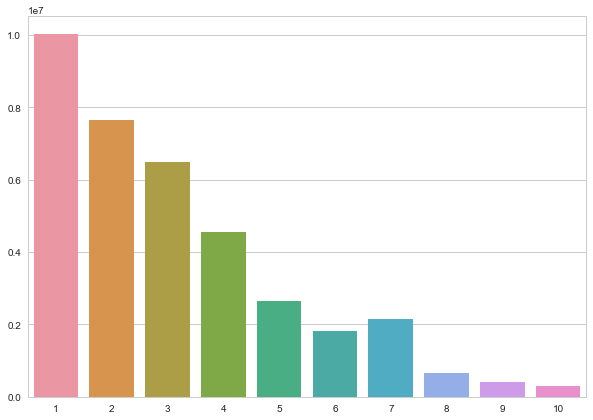

In [181]:
# diffCount = diff.value_counts()
# diffCount.index = (diffCount.index / np.timedelta64(1, 'D')).astype(int)
diffCount = diffCount.sort_values(ascending=False)
top10 = diffCount[:10]
sns.barplot(top10.index, top10.values)
# get current axis
# ax = plt.gca()
# get current xtick labels

# convert all xtick labels to selected format from ms timestamp
# ax.set_xticklabels([pd.to_datetime(tm, unit='ms').strftime('%Y-%m-%d\n %H:%M:%S') for tm in xticks],
#  rotation=50)

# plt.show()


### Features Correlated with the Hotel Cluster

In [ ]:
#Plot all numeric features corrolated with the Hotel Cluster
numCol=expediaDF.select_dtypes(include=[np.number]).columns.tolist()
print('There is : ',len(numCol),' numeric columns')
for i in range(0,36,4):
    sns.pairplot(expediaDF,x_vars=numCol[i:i+4],y_vars=['hotel_cluster'])

There is :  21  numeric columns


Total n. hotel clusters:  100


In [46]:
data.groupby(['site_name', 'posa_continent'])['posa_continent'].size()

site_name  posa_continent
2          3                 136321
6          0                     64
7          1                    325
8          4                   2683
9          1                    240
10         0                    430
11         3                  13871
13         1                   4606
14         1                    532
15         1                    196
16         1                     14
17         1                   2289
18         2                   1846
19         3                    103
20         2                     25
21         1                     59
22         2                    481
23         1                   2676
24         2                   5799
25         2                   1422
26         0                    333
27         2                    423
28         1                    294
29         1                    348
30         4                    729
31         2                     24
32         1                    411
33

In [53]:
data.dtypes

date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
is_booking                     int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
dtype: object